In [3]:
# for conversion to PDF use these settings
%matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
#%matplotlib notebook
qr_setting = None
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

# Applications of the SVD

<!-- image credit: https://en.wikipedia.org/wiki/Swiss_Army_knife -->

<center>

<img src="images/440px-Wenger_EvoGrip_S17.JPG" alt="Figure" width="440px">
    
</center>

>The Singular Value Decomposition is the __“Swiss Army Knife”__ and the __“Rolls Royce”__ of matrix decompositions.

-- Diane O'Leary

Today we will concern ourselves with the "Swiss Army Knife" aspect of the SVD.    

Our focus today will be on applications to data analysis.

So our matrices today will be data matrices.

(Rather than thinking of matrices as linear operators).

<!-- image credit: https://xkcd.com/2610/ -->

<center>

<img src="https://imgs.xkcd.com/comics/assigning_numbers.png" alt="Figure" width="350px">
    
</center>

As a specific example, here is a typical data matrix.   This matrix could be the result of measuring a collection of data objects, and noting a set of features for each object.

$${\mbox{$m$ data objects}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}a_{11}\\\vdots\\a_{i1}\\\vdots\\a_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1j}\\\vdots\\a_{ij}\\\vdots\\a_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1n}\\\vdots\\a_{in}\\\vdots\\a_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ features}}$$

For example, rows could be people, and columns could be movie ratings.   

Or rows could be documents, and columns could be words within the documents.

To start discussing the set of tools that SVD provides for analyzing data, let's remind ourselves what the SVD is.

## Recap of SVD

__Theorem.__ Let $A$ be an $m\times n$ matrix with rank $r$.  Then there exists an $m\times n$ matrix $\Sigma$ whose diagonal entries are the first $r$ singular values of $A$, $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0,$ and there exist an $m\times m$ orthogonal matrix $U$ and an $n\times n$ orthogonal matrix $V$ such that 

$$ A = U\Sigma V^T $$

Today we'll work exclusively with the reduced SVD.

Here it is again, for the case where $A$ is $m \times n$, and $A$ has rank $r$.

In that case, the reduced SVD looks like this, with singular values on the diagonal of $\Sigma$:

$m\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\Large n} =
\overbrace{\left[\begin{array}{ccc}\vdots&&\vdots\\\vdots&&\vdots\\\mathbf{u}_1&\cdots&\mathbf{u}_r\\\vdots&&\vdots\\\vdots&&\vdots\end{array}\right]}^{\large r}
\times
\left[\begin{array}{ccc}\sigma_1& &\\&\ddots&\\&&\sigma_r\end{array}\right]
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\&&\vdots&&\\\dots&\dots&\mathbf{v}_r&\dots&\dots\end{array}\right]$

$$\Large\overset{m\,\times\, n}{A^{\vphantom{T}}} = \overset{m\,\times\, r}{U^{\vphantom{T}}}\;\;\overset{r\,\times\, r}{\Sigma^{\vphantom{T}}}\;\;\overset{r\,\times\, n}{V^T}$$

Note that for the reduced version, both $U$ and $V$ have orthonormal columns.    This means that:

$$ U^TU = I $$

and 

$$ V^TV = I. $$

(However, $U$ and $V$ are not square in this version, so they are not orthogonal matrices.)

Recall as well, that the route to the SVD starting by asking "What unit vector $\mathbf{x}$ maximizes $\Vert A\mathbf{x}\Vert$"?

We found that the answer is $\mathbf{v_1}$, the first row of $V^T$.

You should be able to see that the SVD of $A^T$ is $V\Sigma U^T$.

So, we can make the corresponding observation that the unit vector that maximizes $\Vert A^T\mathbf{x}\Vert$ is $\mathbf{u_1}$, the first column of $U$.

## Approximating a Matrix

To understand the power of SVD for analyzing data, it helps to think of it as a tool for __approximating one matrix by another, simpler, matrix.__

To talk about when one matrix __approximates__ another, we need a "length" for matrices.  

We will use the __Frobenius norm__.

The Frobenious norm is just the usual vector norm, treating the matrix as if it were a vector.

In other words, the definition of the Frobenius norm of $A$, denoted $\Vert A\Vert_F$, is:

$$\Vert A\Vert_F = \sqrt{\sum a_{ij}^2}.$$

The approximations we'll discuss are __low-rank__ approximations.

Recall that the rank of a matrix $A$ is the largest number of linearly independent columns of $A$.

Or, equivalently, the dimension of $\operatorname{Col} A$.

Let's define the __rank-$k$ approximation__ to $A$:

When $k < \operatorname{Rank}A$, the rank-$k$ approximation to $A$ is the closest rank-$k$ matrix to $A$, i.e., 

$$A^{(k)} =\arg \min_{\operatorname{Rank}B = k} \Vert A-B\Vert_F.$$

Why is a rank-$k$ approximation valuable?

The reason is that a rank-$k$ matrix may take up __much__ less space than the original $A$.

$m\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\large n} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\sigma_1\mathbf{u}_1&\sigma_k\mathbf{u}_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\\dots&\dots&\mathbf{v}_k&\dots&\dots\end{array}\right]$

The rank-$k$ approximation takes up space $(m+n)k$ while $A$ itself takes space $mn$.

For example, if $k=10$ and $m = n = 1000$, then the rank-$k$ approximation takes space $20000/1000000 = 2\%$ of $A$.

The key to using the SVD for matrix approximation is as follows:

__The best rank-$k$ approximation to any matrix can be found via the SVD.__

In fact, for an $m\times n$ matrix $A$, the SVD does two things:

1. It gives the best rank-$k$ approximation to $A$ for __every__ $k$ up to the rank of $A$.
2. It gives the __distance__ of the best rank-$k$ approximation $A^{(k)}$ from $A$ for each $k$.

When we say "best", we mean in terms of Frobenius norm $\Vert A-A^{(k)}\Vert_F$, 

and by distance we mean the same quantity, $\Vert A-A^{(k)}\Vert_F$.

How do we use SVD to find the best rank-$k$ approximation to $A$?

In terms of the singular value decomposition, 

the best rank-$k$ approximation to $A$ is formed by taking 

* $U' =$ the $k$ leftmost columns of $U$, 
* $\Sigma ' =$ the $k\times k$ upper left submatrix of $\Sigma$, and 
* $(V')^T=$ the $k$ upper rows of $V^T$, 

and constructing 

$$A^{(k)} = U'\Sigma'(V')^T.$$

The distance (in Frobenius norm) of the best rank-$k$ approximation $A^{(k)}$ from $A$ is equal to $\sqrt{\sum_{i=k+1}^r\sigma^2_i}$.

Notice that this quantity is summing over the singular values __beyond__ $k$.

What this means is that if, beyond some $k$, all of the singular values are small, then __$A$ can be closely approximated by a rank-$k$ matrix.__   

## Signal Compression

When working with measurement data, ie measurements of real-world objects, we find that data is often  __approximately low-rank.__

In other words, a matrix of measurements can often be well approximated by a low-rank matrix.

Classic examples include 
* measurements of human abilities - eg, psychology
* measurements of human preferences -- eg, movie ratings, social networks
* images, movies, sound recordings
* genomics, biological data
* medical records
* text documents 

For example, here is a photo.

We can think of this as a $512\times 512$ matrix $A$ whose entries are grayscale values (numbers between 0 and 1).

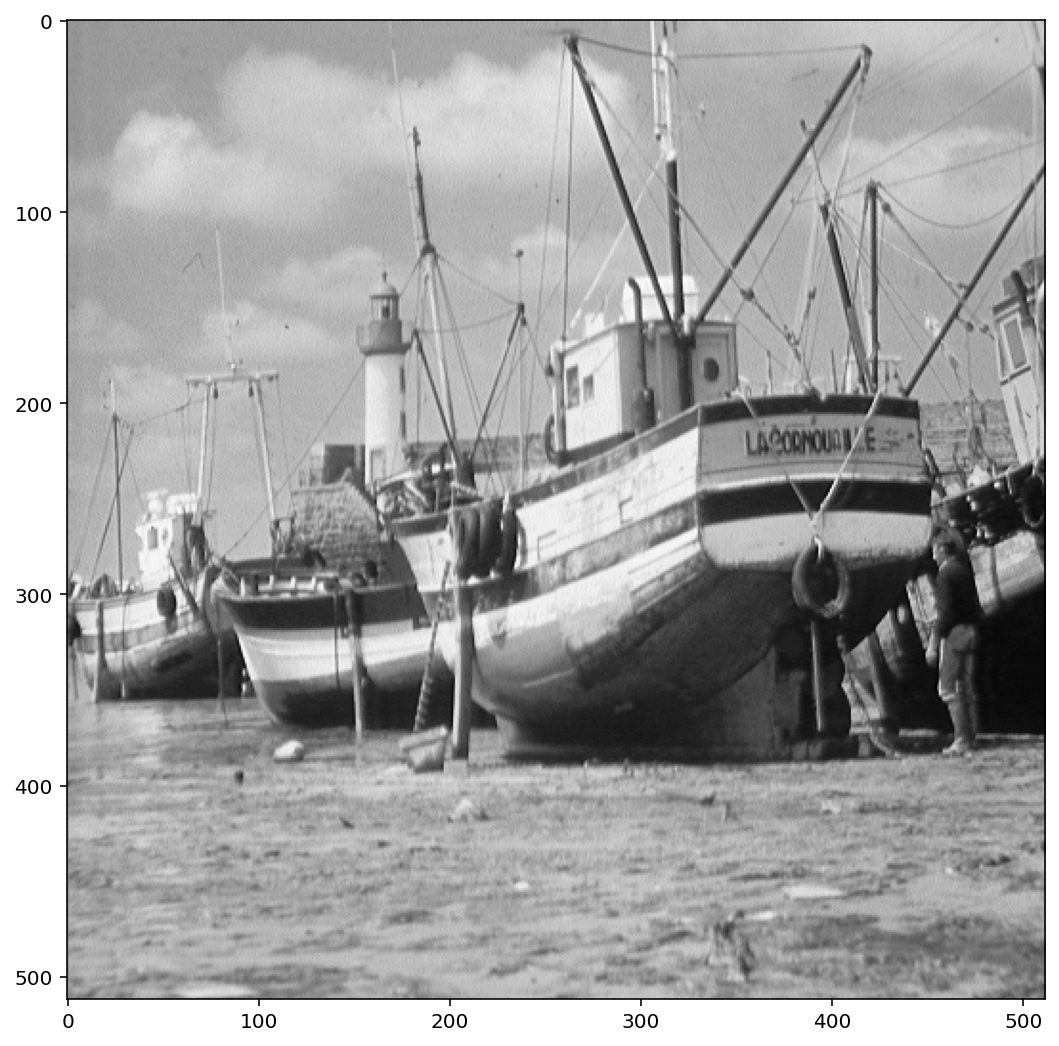

In [4]:
boat = np.loadtxt('data/boat.dat')
import matplotlib.cm as cm
plt.figure(figsize=(9,9))
plt.imshow(boat,cmap = cm.Greys_r);

Let's look at the singular values of this matrix.

We compute $A = U\Sigma V^T$ and look at the values on the diagonal of $\Sigma$.

This is often called the matrix's "spectrum".

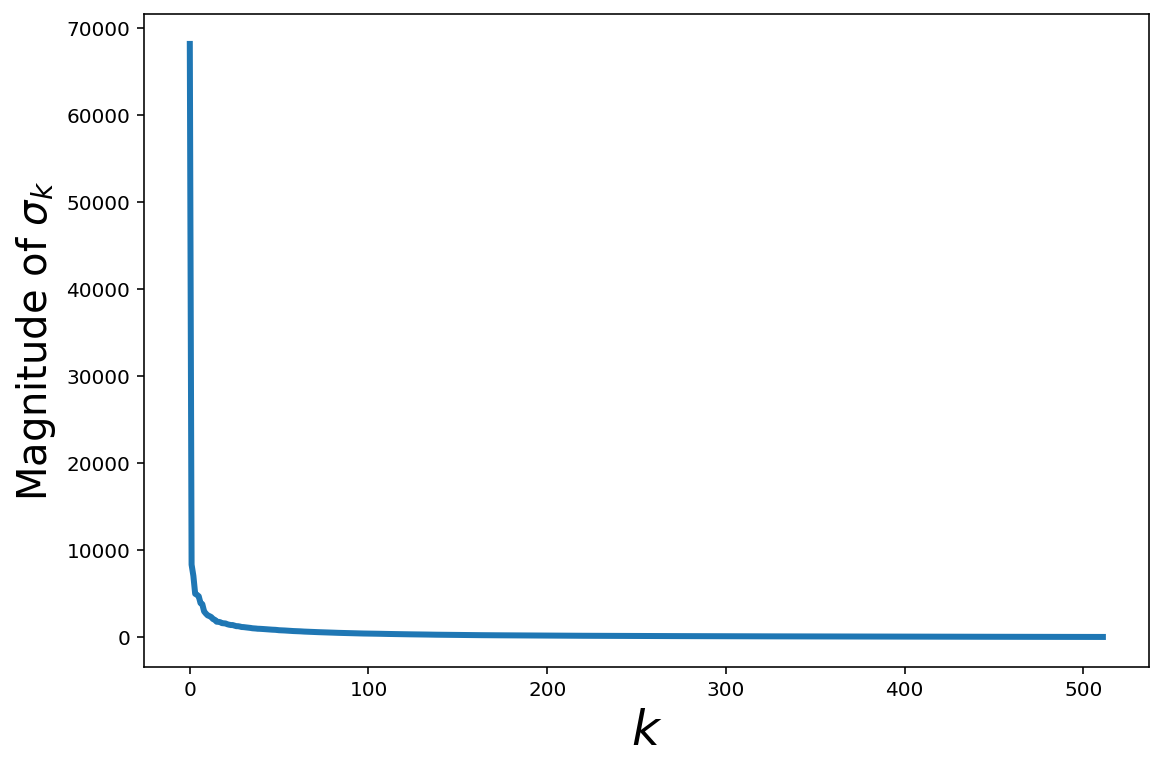

In [5]:
u, s, vt = np.linalg.svd(boat, full_matrices=False)
plt.figure(figsize=(9,6))
plt.plot(s, lw=3)
plt.ylabel(r'Magnitude of $\sigma_k$', size=20)
plt.xlabel(r'$k$', size=24); 

What is this telling us?   

Most of the singular values of $A$ are quite small. 

Only the first few singular values are large -- up to, say, $k$ = 40.

Remember that the error we get when we use a rank-$k$ approximation is

$$\sqrt{\sum_{i=k+1}^r\sigma^2_i}.$$

So we can use the singular values of $A$ to compute the relative error over a range of possible approximations $A^{(k)}$.

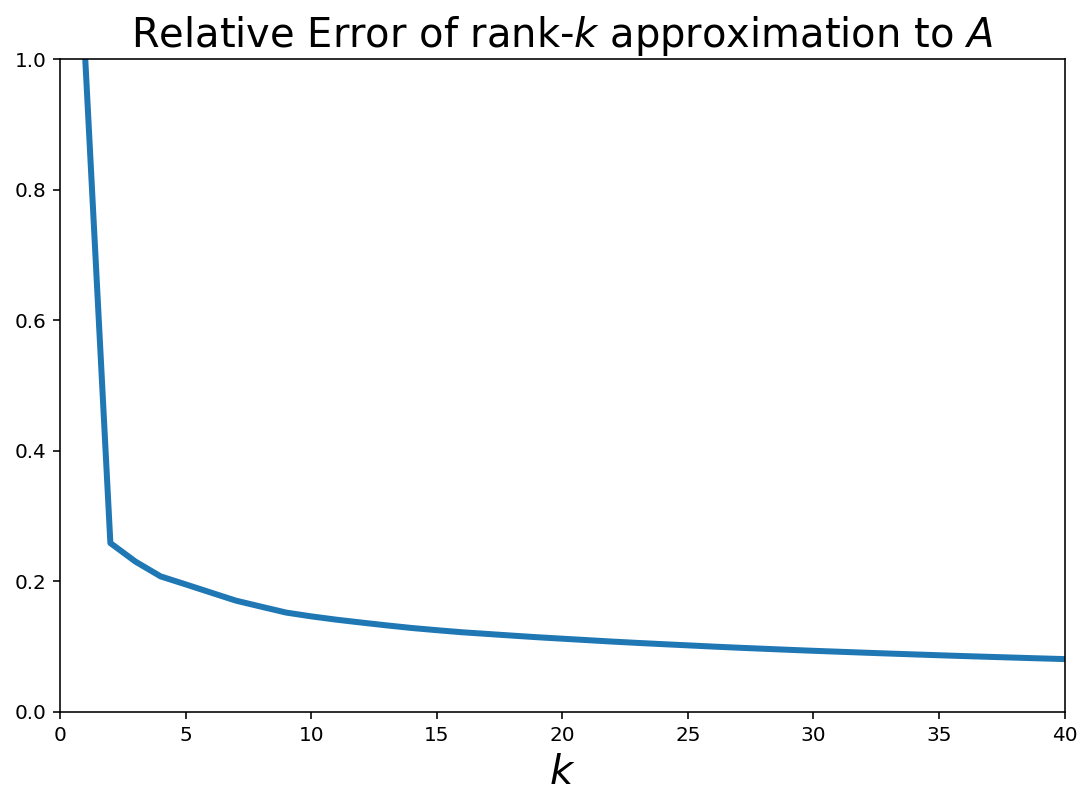

In [6]:
fig = plt.figure(figsize=(9,6))
Anorm = np.linalg.norm(boat)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(1,41), err[:40]/Anorm, lw=3)
plt.xlim([0,40])
plt.ylim([0,1])
plt.xlabel(r'$k$', size=20)
plt.title(r'Relative Error of rank-$k$ approximation to $A$', size=20); 

This matrix $A$ has rank of 512.   

But the error when we approximate $A$ by a rank 40 matrix is only around 10\%.

We say that the __effective__ rank of $A$ is low (perhaps 40).

Let's find the closest rank-40 matrix to $A$ and view it.

We can do this quite easily using the SVD.   

We simply construct our approximation of $A$ using only the first 40 columns of $U$ and top 40 rows of $V^T$.

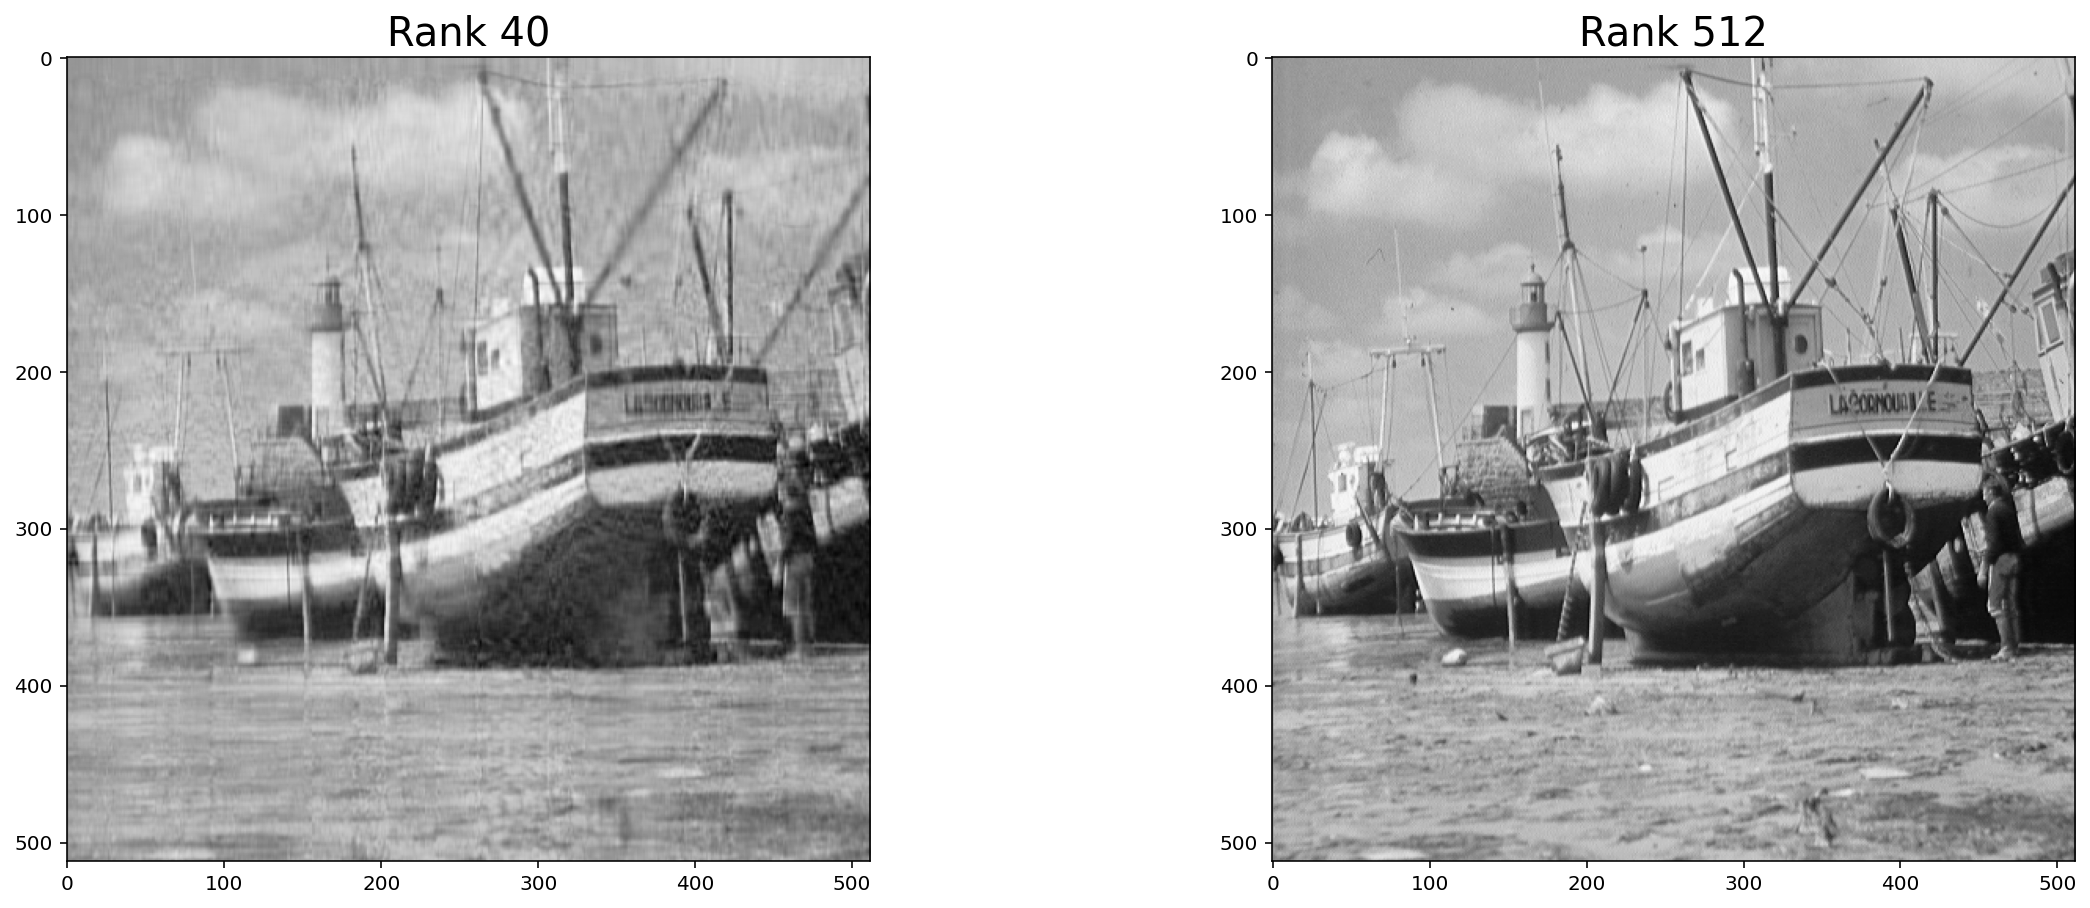

In [7]:
# construct a rank-n version of the boat
u, s, vt = np.linalg.svd(boat, full_matrices=False)
scopy = s.copy()
rank = 40
scopy[rank:]=0
boatApprox = u @ np.diag(scopy) @ vt
#
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank), size=20)
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512', size=20)
plt.subplots_adjust(wspace=0.5);

Note that the rank-40 boat takes up only 40/512 = __8% of the space of the original image!__

This general principle is what makes image, video, and sound compression effective.  

When you 
* watch HDTV, or 
* listen to an MP3, or 
* look at a JPEG image, 

these signals have been compressed using the fact that they are __effectively low-rank__ matrices.

As you can see from the example of the boat image, it is often possible to compress such signals enormously, leading to an immense savings of storage space and transmission bandwidth.

In fact the entire premise of the show "Silicon Valley" is based on this fact :)

## Dimensionality Reduction

Another way to think about what we just did is "dimensionality reduction".

Consider this common situation:
    
${\mbox{m objects}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}a_{11}\\\vdots\\a_{i1}\\\vdots\\a_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1j}\\\vdots\\a_{ij}\\\vdots\\a_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1n}\\\vdots\\a_{in}\\\vdots\\a_{mn}\end{array}
\end{array}\right]}^{\mbox{n features}} =
\overbrace{\left[\begin{array}{ccc}\vdots&&\vdots\\\vdots&&\vdots\\\mathbf{u}_1&\cdots&\mathbf{u}_k\\\vdots&&\vdots\\\vdots&&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccc}\sigma_1& &\\&\ddots&\\&&\sigma_k\end{array}\right]
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\&&\vdots&&\\\dots&\dots&\mathbf{v}_k&\dots&\dots\end{array}\right]$

The $U$ matrix has a row for each data object.  

Notice that the original data objects had $n$ features, but each row of $U$ only has $k$ entries.

Despite that, a row of $U$ can still provide most of the information in the corresponding row of $A$ 

(To see that, note that we can approximately recover the original row by simply multiplying the row of $U$ by $\Sigma V^T$).

So we have __reduced the dimension__ of our data objects -- from $n$ down to $k$ -- without losing much of the information they contain.

## Principal Component Analysis

This kind of dimensionality reduction can be done in an __optimal__ way.

The method for doing it is called __Principal Component Analysis__ (or PCA).

What does __optimal__ mean in this context?

Here we use a statistical criterion: a dimensionality reduction that captures the maximum __variance__ in the data.

Here is a classic example.

Consider the points below, which live in $\mathbb{R}^2$.

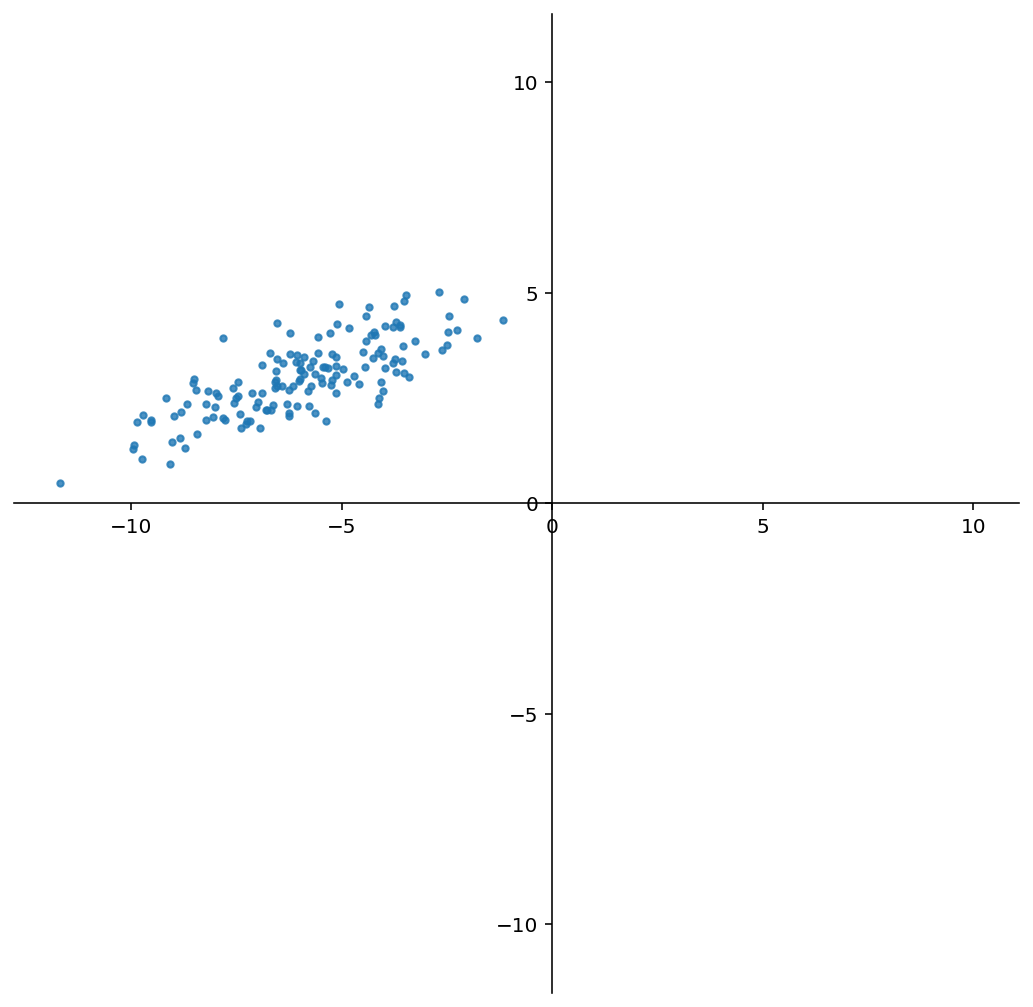

In [8]:
n_samples = 150
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
ax = ut.plotSetup(-10,10,-10,10,(9,9))
ut.centerAxes(ax)
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8);

Now, although the points are in $\mathbb{R}^2$, they seem to show effective low-rank.

That is, it might not be a bad approximation to replace each point by a point in a 1-D dimensional space, that is, along a line.

What line should we choose?   We will choose the line such that the __sum of the distances of the points to the line is minimized.__

The points, projected on this line, will capture the maximum variance in the data (because the remaining errors are minimized).

What would happen if we used SVD at this point, and kept only rank-1 approximation to the data?

This would be the 1-D __subspace__ that approximates the data best in Frobenius norm.

However the variance in the data is defined with respect to the data mean, so we need to mean-center the data first, before using SVD.

That is, without mean centering, SVD finds the best 1-D subspace, not the best line though the data (which might not pass through the origin).

So to capture the best line through the data, we first move the data points to the origin:

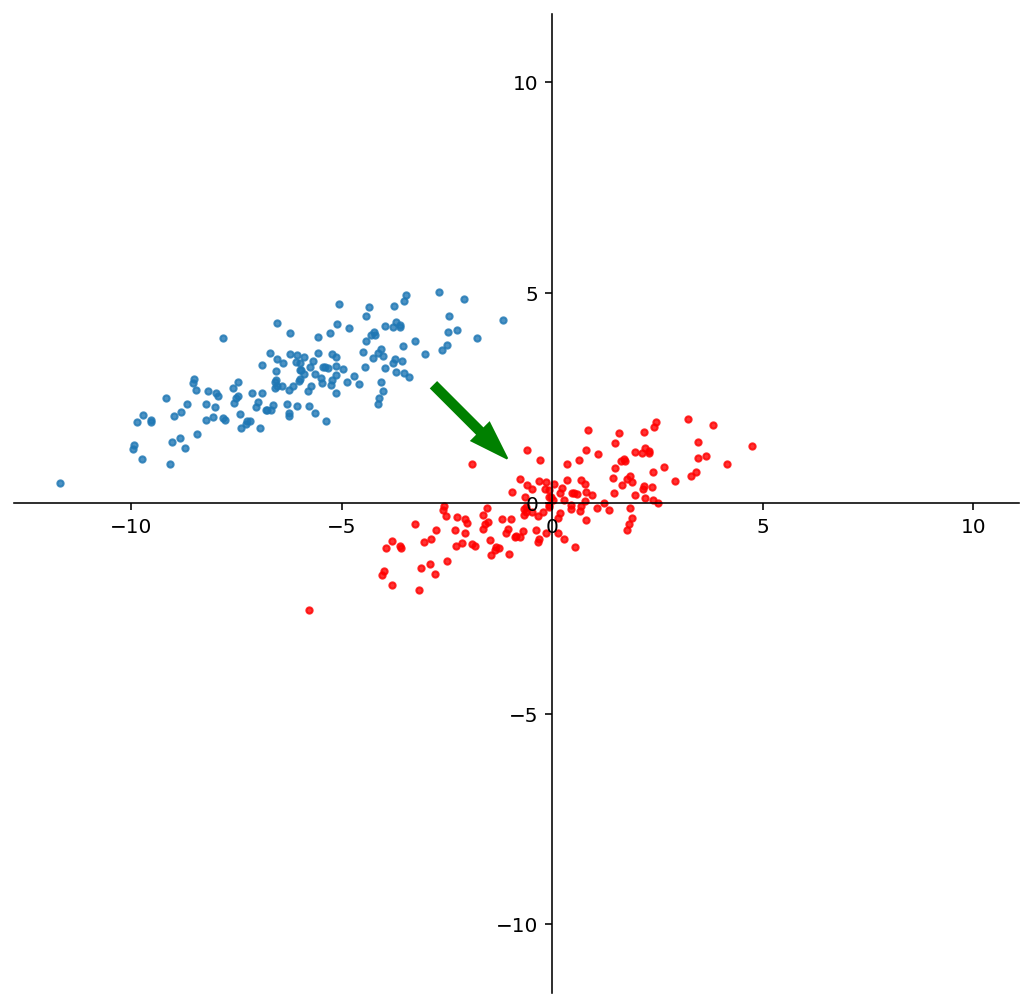

In [9]:
Xc = X - np.mean(X,axis=0)
ax = ut.plotSetup(-10,10,-10,10,(9,9))
ut.centerAxes(ax)
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.arrow(-2.8, 2.8, 1.1, -1.1, width=0.2, head_width=0.6, color='g')
_ = plt.scatter(Xc[:, 0], Xc[:, 1], s=10, alpha=0.8, color='r')

Now we use SVD to construct the best 1-D approximation of the mean-centered data:

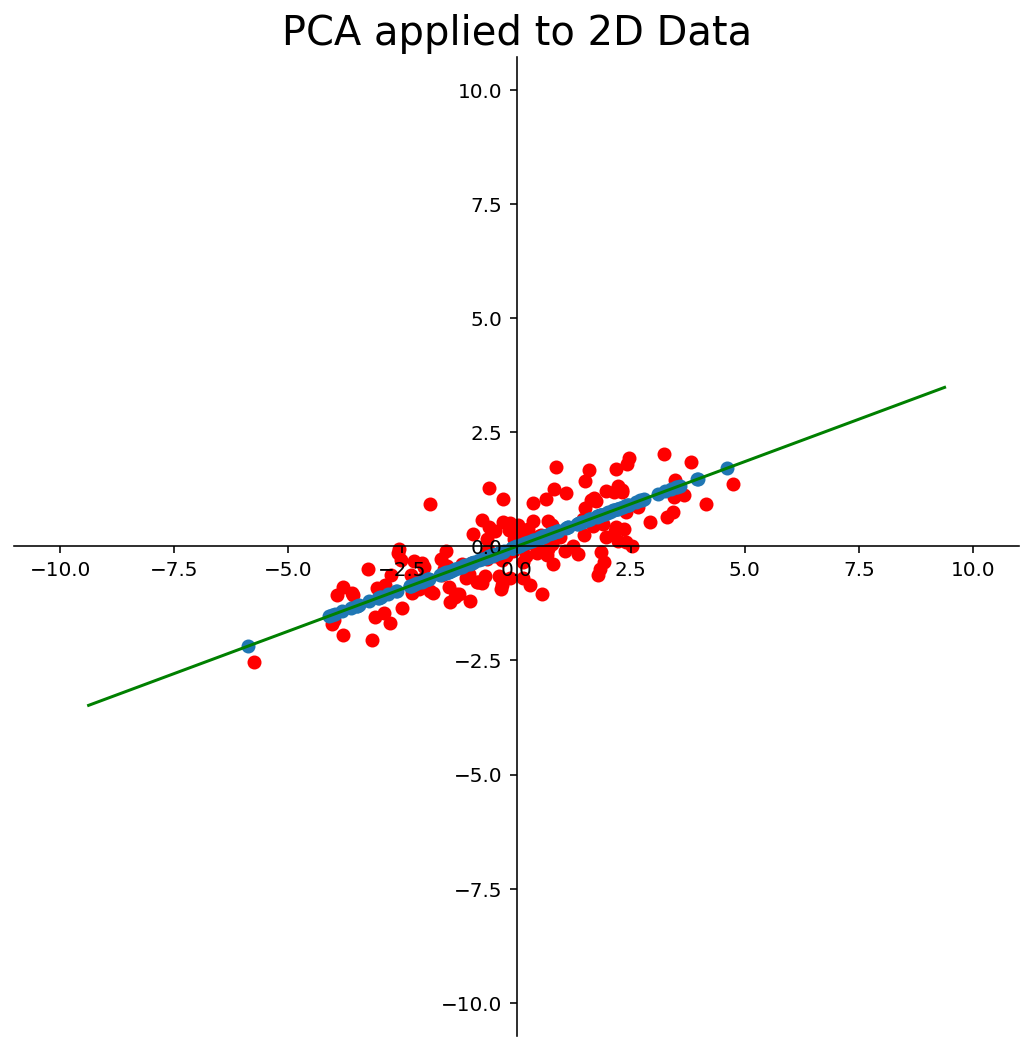

In [10]:
u, s, vt = np.linalg.svd(Xc,full_matrices=False)
scopy = s.copy()
scopy[1] = 0.
reducedX = u @ np.diag(scopy) @ vt
ax = ut.plotSetup(-10,10,-10,10,(9,9))
ut.centerAxes(ax)
plt.axis('equal')
plt.scatter(Xc[:,0],Xc[:,1], color='r')
plt.scatter(reducedX[:,0], reducedX[:,1])
endpoints = np.array([[-10],[10]]) @ vt[[0],:]
plt.plot(endpoints[:,0], endpoints[:,1], 'g-')
plt.title('PCA applied to 2D Data', size=20);

This method is called __Principal Component Analysis.__

In summary, PCA consists of:

1. Mean center the data, and
2. Reduce the dimension of the mean-centered data via SVD.

It winds up constructing the __best low dimensional approximation of the data__ in terms of variance.

This is equivalent to projecting the data onto the subspace that captures the maximum variance in the data.

That is, each point is replaced by a point in $k$ dimensional space such that the total error (distances between points and their replacements) is minimized.

## Visualization using PCA

I'll now show an extended example to give you a sense of the power of PCA.

Let's analyze some really high-dimensional data: __documents.__

A common way to represent documents is using the bag-of-words model.

In this matrix, rows are documents, columns are words, and entries count how many time a word appears in a document.  

This is called a _document-term matrix._

$${\mbox{$m$ documents}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}a_{11}\\\vdots\\a_{i1}\\\vdots\\a_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1j}\\\vdots\\a_{ij}\\\vdots\\a_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}a_{1n}\\\vdots\\a_{in}\\\vdots\\a_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ terms}}$$

We are touching on a broad topic, called Latent Semantic Analysis, which is essentially the application of linear algebra to document analysis.

You can learn about Latent Semantic Analysis in other courses in data science or natural language processing.

Our text documents are going to be posts from certain discussion forums called "newsgroups". 

We will collect posts from three groups:
`comp.os.ms-windows.misc`, `sci.space`, and `rec.sport.baseball`.

I am going to skip over some details.  However, all the code is in this notebook, so you can explore it on your own if you like.

In [11]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.os.ms-windows.misc', 'sci.space', 'rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(news_data.data).todense()

In [12]:
print('The size of our document-term matrix is {}'.format(dtm.shape))

The size of our document-term matrix is (1781, 9409)


So we have 1781 documents, and there 9409 different words that are contained in the documents.  We can think of each document as a vector in 9409-dimensional space.

Let us apply PCA to the document-term matrix.   

First, we mean center the data.

In [13]:
centered_dtm = dtm - np.mean(dtm, axis=0)

Now we compute the SVD of the mean-centered data:

In [14]:
u, s, vt = np.linalg.svd(centered_dtm)

Now, we use PCA to visualize the set of documents.   

Our visualization will be in two dimensions.

This is pretty extreme ...

-- we are taking points in 9409-dimensional space and projecting them into a subspace of only two dimensions!

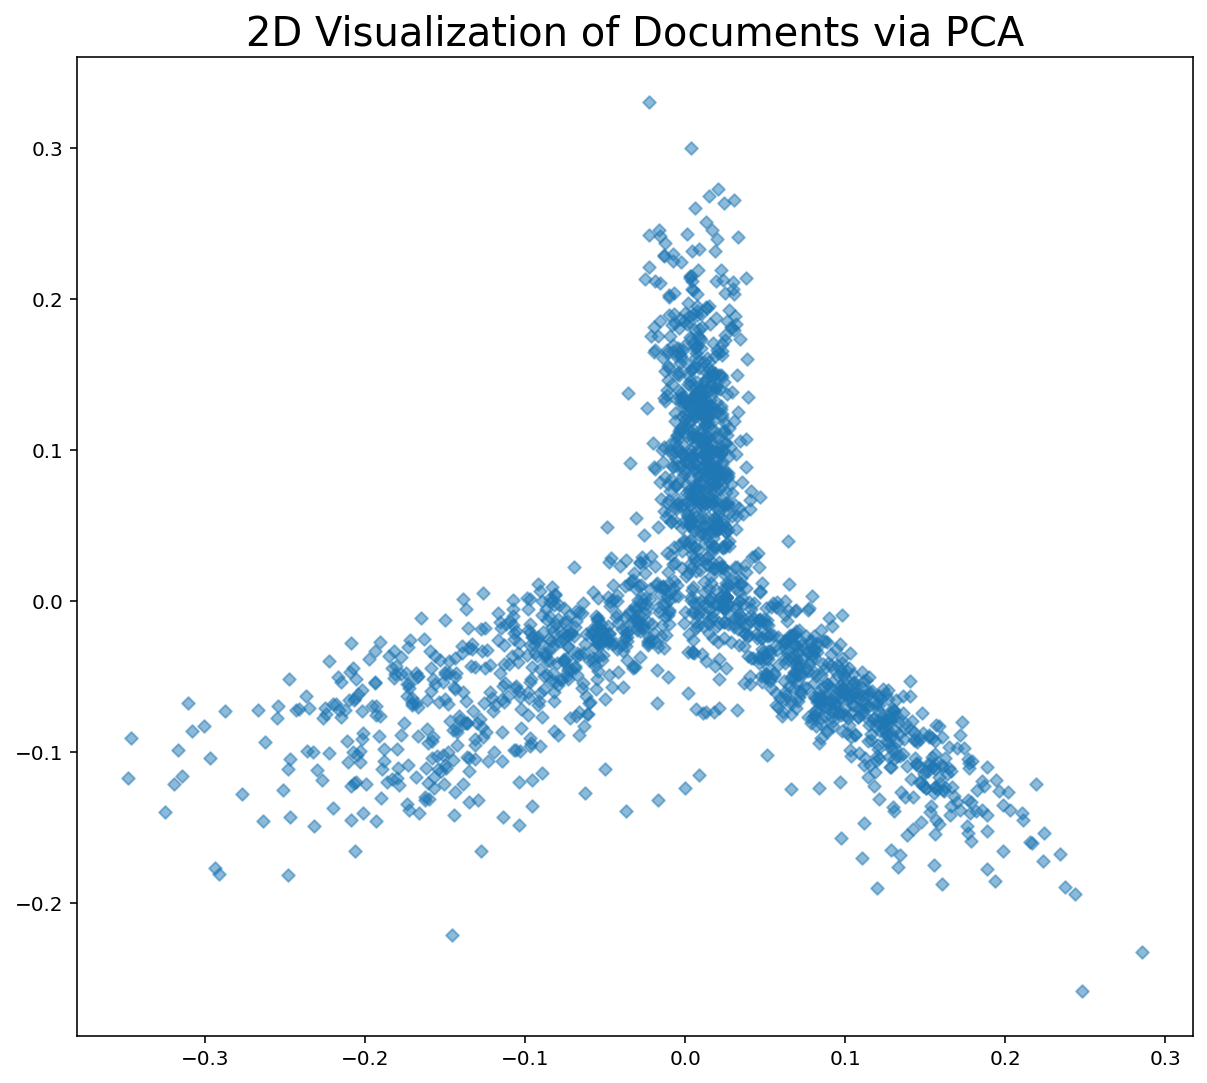

In [15]:
Xk = u @ np.diag(s)
fig, ax = plt.subplots(1,1,figsize=(10,9))
plt.scatter(np.ravel(Xk[:,0]), np.ravel(Xk[:,1]), 
                    s=20, alpha=0.5, marker='D')
plt.title('2D Visualization of Documents via PCA', size=20);

This visualization shows that our collection of documents has considerable internal structure.

In particular, based on word frequency, it appears that there are three general groups of documents.

As you might guess, this is because the discussion topics of the document sets are different:

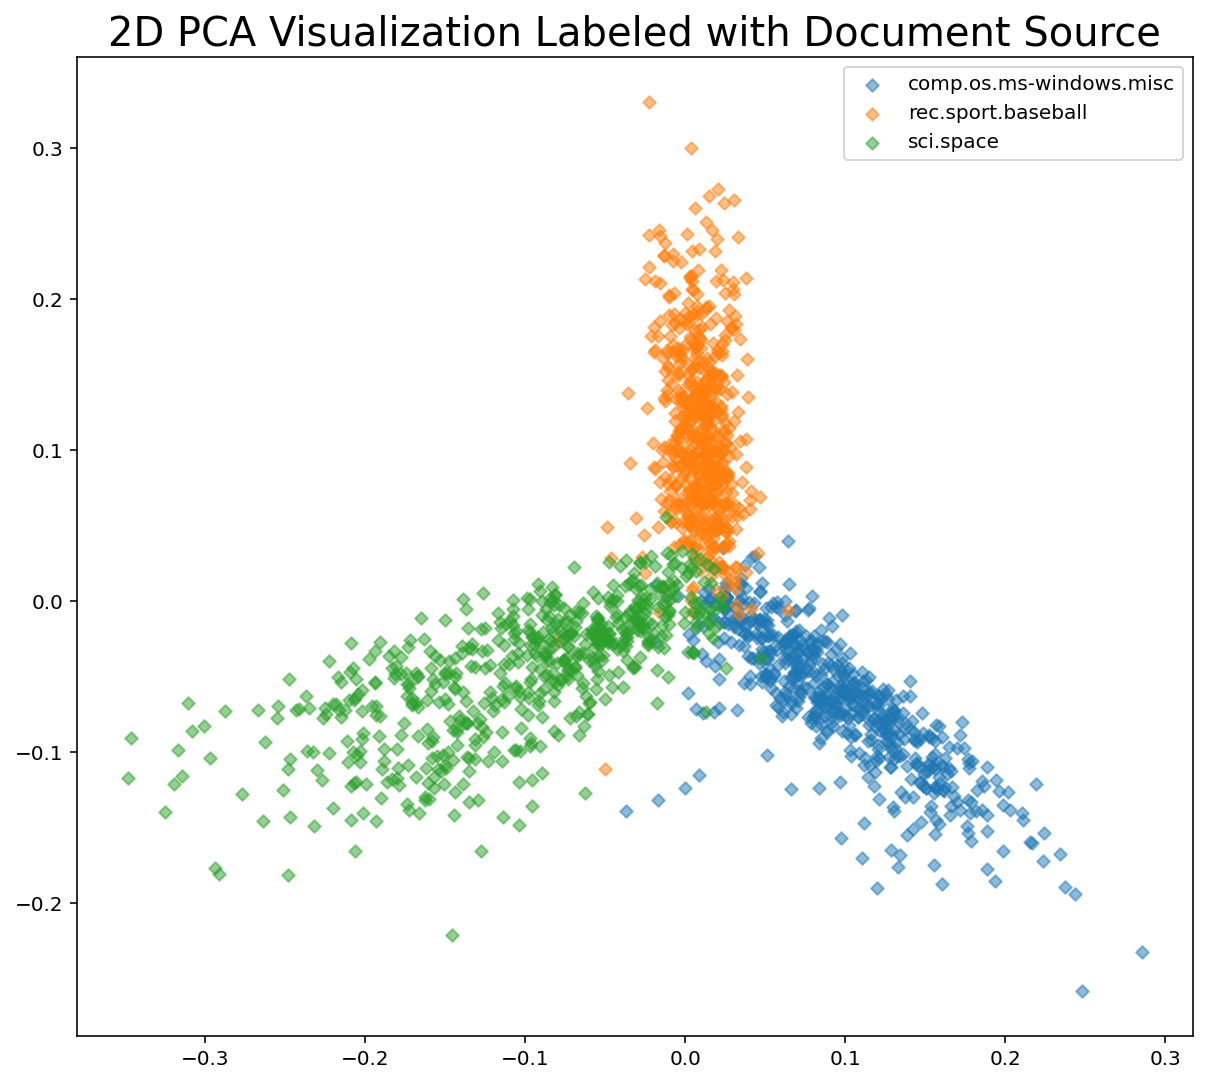

In [16]:
Xk = u @ np.diag(s)
fig, ax = plt.subplots(1,1,figsize=(10,9))
for i, label in enumerate(set(news_data.target)):
        point_indices = np.where(news_data.target == label)[0]
        plt.scatter(np.ravel(Xk[point_indices,0]), np.ravel(Xk[point_indices,1]), 
                    s=20, alpha=0.5, marker='D', label=news_data.target_names[i])
plt.legend(loc='best')
plt.title('2D PCA Visualization Labeled with Document Source', size=20);

### Wrapup

<center>

<img src="images/in-conclusion.jpg" alt="Figure" width="550px">
    
</center>

We have reached the end!

Of course, this is not really the end ... more like the beginning.

If we had more time, we'd talk about how linear algebra informs the study of graphs, the methods of machine learning, data mining, and many more topics.  

So this is just where we have to stop.

> As long as Algebra and Geometry have been separated, their progress has been slow and their usages limited; but when these two sciences were reunited, they lent each other mutual strength and walked together with a rapid step towards perfection.
>
> — Count Joseph-Louis de Lagrange

We have looked at the richness of linear algebra from many angles.

We have seen that the simple linear system $A\mathbf{x} = \mathbf{b}$ leads to a whole collection of interesting questions, questions that have unfolded step by step over the course of the semester.

But we have also seen that we can extract the idea of matrix out of a linear system, and consider it as an object in its own right.

Considered on their own, matrices can be seen as linear operators, giving us tools for computer graphics and the solution of dynamical systems and linear equations.

We have also seen that matrices can be seen as data objects, whose linear algebraic properties expose useful facts about the data.

There are many courses you can go on to from here, which will rely on your understanding of linear algebra:

* CS 365 Foundations of Data Science
* CS 440 Intro to Artificial Intelligence
* CS 480 Intro to Computer Graphics
* CS 505 Intro to Natural Language Processing
* CS 506 Tools for Data Science
* CS 507 Intro to Optimization in ML
* CS 523 Deep Learning
* CS 530 Advanced Algorithms
* CS 531 Advanced Optimization Algorithms
* CS 533 Spectral Methods
* CS 542 Machine Learning
* CS 565 Algorithmic Data Mining
* CS 581 Computational Fabrication
* CS 583 Audio Computation

In each of these you will use and build on your knowledge of linear algebra.

Enjoy!